In [3]:
import gkw
import derivative
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [12]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [24]:
# File import
filename = 'data/S6_rtl6.0/gkwdata.h5'
f = h5py.File(filename,"r+")

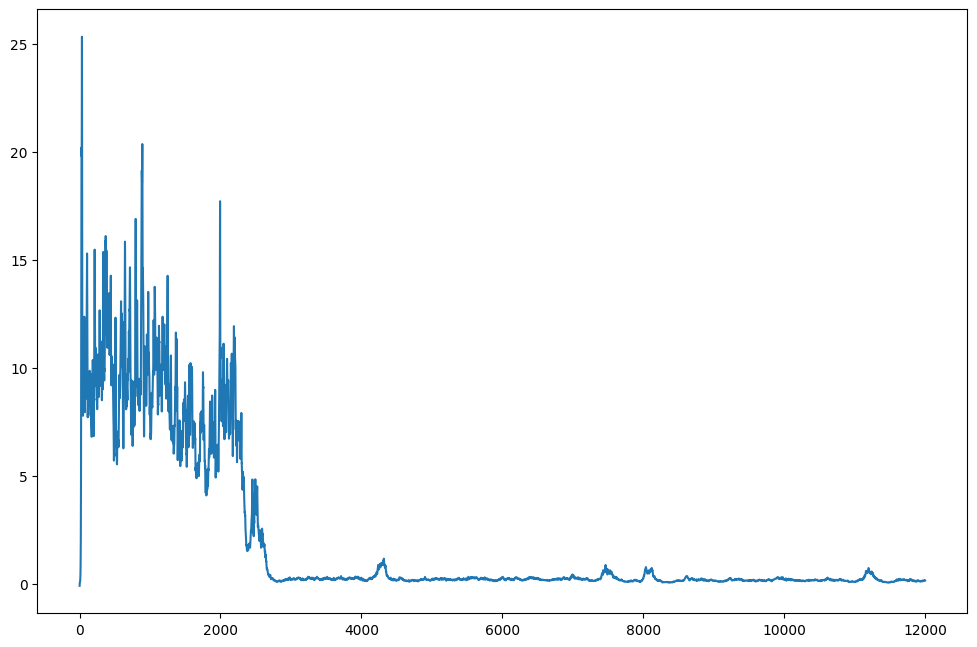

In [14]:
# Heat flux
eflux_data, time = gkw.get_eflux_from_hdf5_file(f)
plt.plot(time[0], eflux_data)

In [15]:
# Elektrostatic potencial
phi = f[gkw.find_key(f, 'phi')][()]
nx = phi.shape[0]

In [22]:
# Mean over y to get a approximation for the zonal potenzial
zonal_pot = np.mean(phi,1)

In [60]:
# Finite Differnece for shearing rate omega_ExB

# Stepsize
rad_boxsize = f[gkw.find_key(f, 'lxn')][()][0]
dx = rad_boxsize/nx

print(rad_boxsize, dx)

76.27048929506829 0.595863197617721


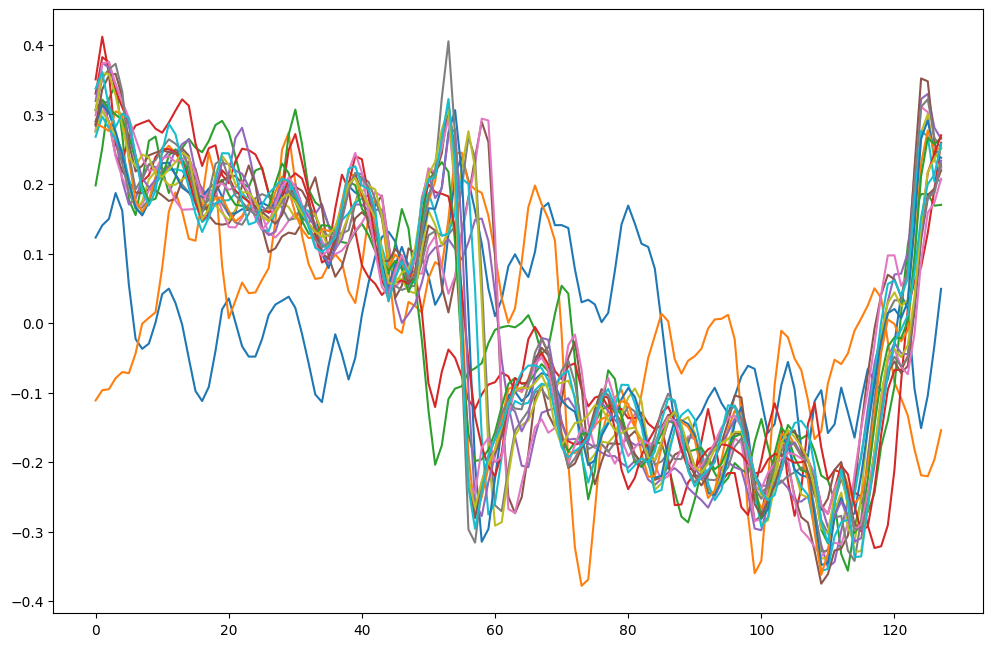

In [63]:
# Plot all
start, end = 0, 999 
while end <= zonal_pot.shape[1]:

    ddphi = derivative.finite_second_order(zonal_pot[:,start:end], dx, 'period')
    wexb = 0.5 * np.mean(ddphi,1)

    plt.plot(wexb)
    
    start += 1000
    end += 1000
    
plt.savefig('../pictures/S6_rtl6.0/wexb_all.pdf', bbox_inches='tight')

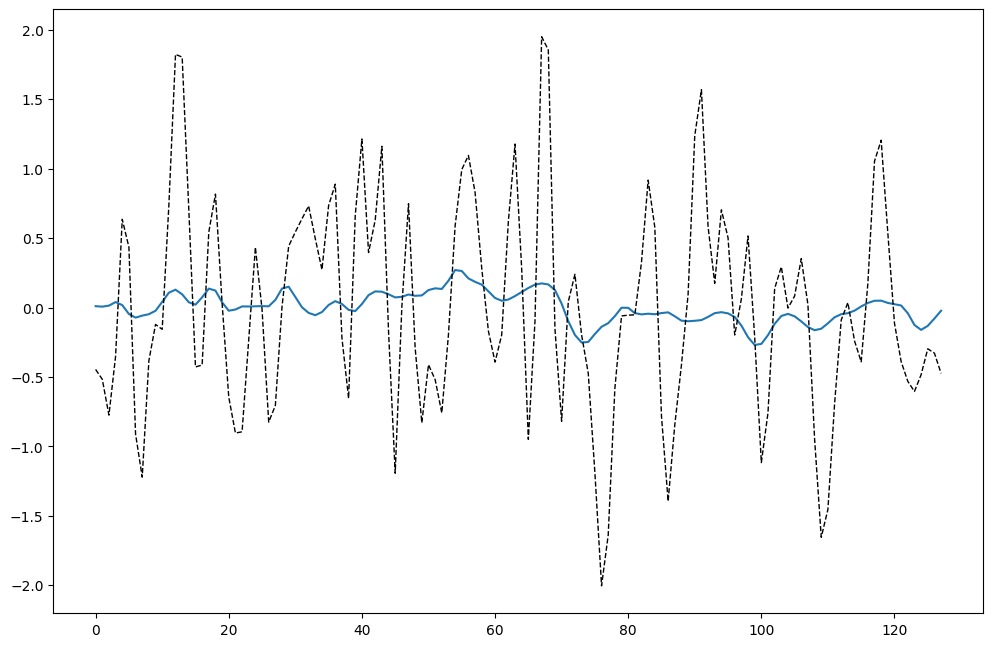

In [73]:
# Plot from 500:2000 timesteps with mean over that interval
# Plot of a signal in the middle of the time interval (1250)
start, end = 500, 2000
middle = int((end - start)/2)

ddphi= derivative.finite_second_order(zonal_pot[:,start:end], dx, 'period')
wexb = 0.5 * np.mean(ddphi,1)
wexb_middle = 0.5*ddphi[:,middle]

plt.plot(wexb)
plt.plot(wexb_middle, 'black', linestyle='--', linewidth=1)
#plt.plot(np.arange(0,128), np.repeat(0.3,128))

plt.savefig('../pictures/S6_rtl6.0/wexb_'+str(start)+'_'+str(end)+'.pdf', bbox_inches='tight')

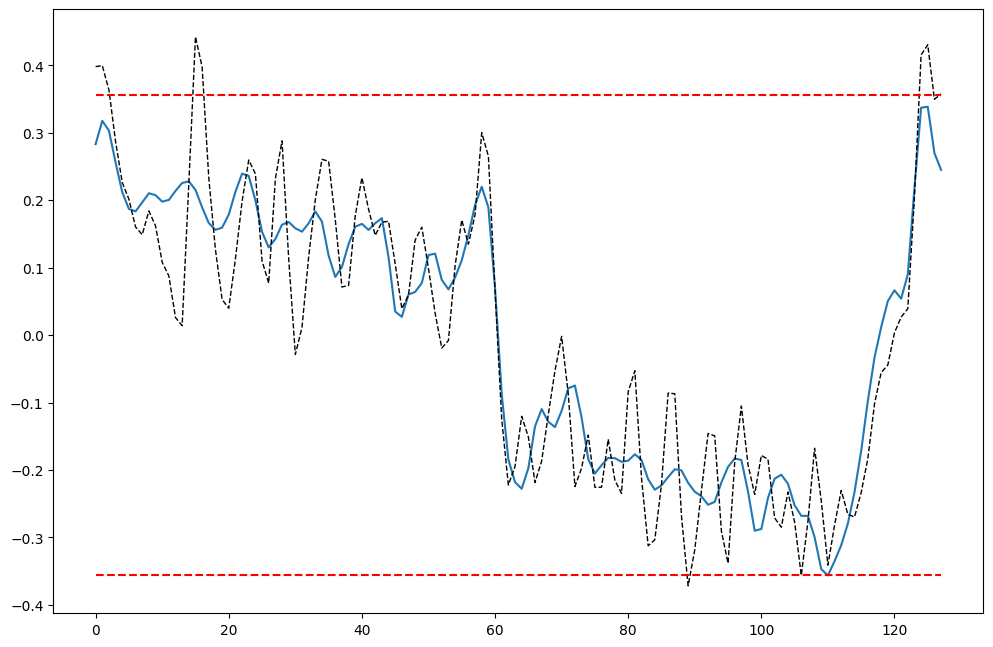

In [81]:
# Plot from 4000:6000 timesteps with mean over that interval
# Plot of a signal in the middle of the time interval (5000)
start, end = 4000, 6000
middle = int((end - start)/2)

ddphi= derivative.finite_second_order(zonal_pot[:,start:end], dx, 'period')
wexb = 0.5 * np.mean(ddphi,1)
wexb_middle = 0.5*ddphi[:,middle]

plt.plot(wexb)
plt.plot(wexb_middle, 'black', linestyle='--', linewidth=1)
plt.plot(np.arange(0,128),np.repeat(max(abs(wexb)),128), 'r', linestyle='--')
plt.plot(np.arange(0,128),-np.repeat(max(abs(wexb)),128), 'r', linestyle='--')

plt.savefig('../pictures/S6_rtl6.0/wexb_'+str(start)+'_'+str(end)+'.pdf', bbox_inches='tight')

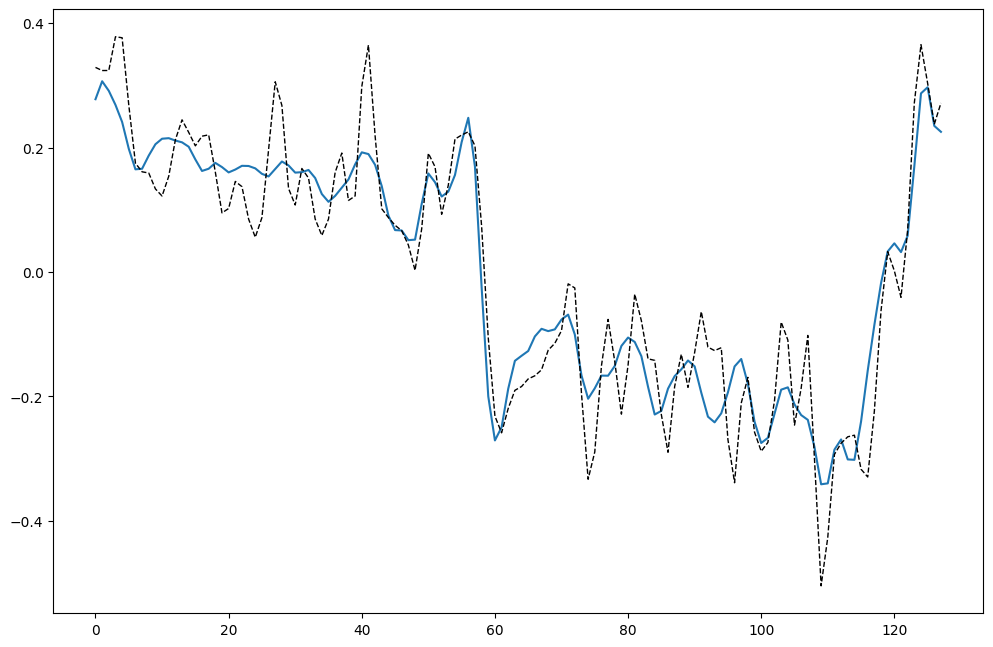

In [66]:
# Plot from 4000:6000 timesteps with mean over that interval
# Plot of a signal in the middle of the time interval (5000)
start, end = 7000, 10000
middle = int((end - start)/2)

ddphi= derivative.finite_second_order(zonal_pot[:,start:end], dx, 'period')
wexb = 0.5 * np.mean(ddphi,1)
wexb_middle = 0.5*ddphi[:,middle]

plt.plot(wexb)
plt.plot(wexb_middle, 'black', linestyle='--', linewidth=1)

plt.savefig('../pictures/S6_rtl6.0/wexb_'+str(start)+'_'+str(end)+'.pdf', bbox_inches='tight')

In [18]:
# !Important! close h5 file after usage 
# f.close()